# Setup


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [36]:
DATASETS = ['dataset/TCGA_GBM_LGG_Mutations_all.csv', './dataset/TCGA_InfoWithGrade.csv']
GRADE = ['LGG','GBM']
PROJECT = ['TCGA-GBM', 'TCGA-GBM']
GENDER = ['Male', 'Female']
PRIMARY_DIAGNOSIS = ['Oligodendroglioma, NOS', 'Mixed glioma', 'Astrocytoma, NOS', 'Astrocytoma, anaplastic', 'Oligodendroglioma, anaplastic', 'Glioblastoma']
RACE = ['White', 'Black or African American', 'Asian', 'American Indian or Alaska Native']
GENES = ['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']
MUTATION = ['Not Mutated', 'Mutated']

# Read Dataset

In [37]:
df_all =  pd.read_csv(DATASETS[0])
df_all.replace(['--', 'not reported'], pd.NA, inplace=True)
df_all.dropna(inplace=True)

df_with_grade =  pd.read_csv(DATASETS[1])

# Distributions

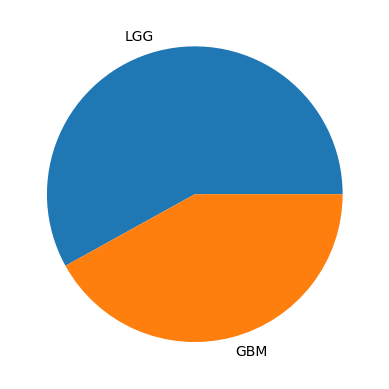

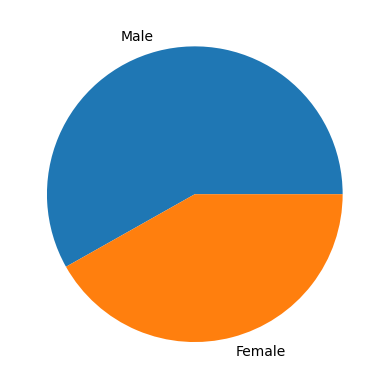

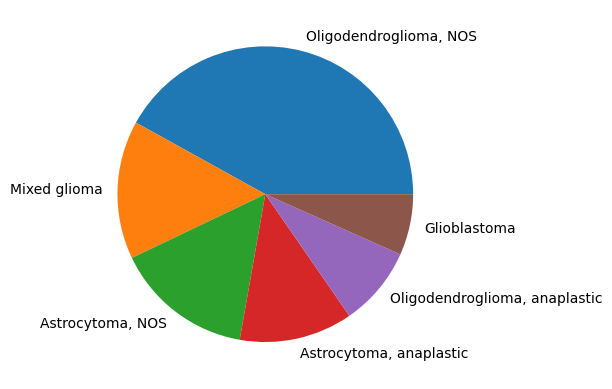

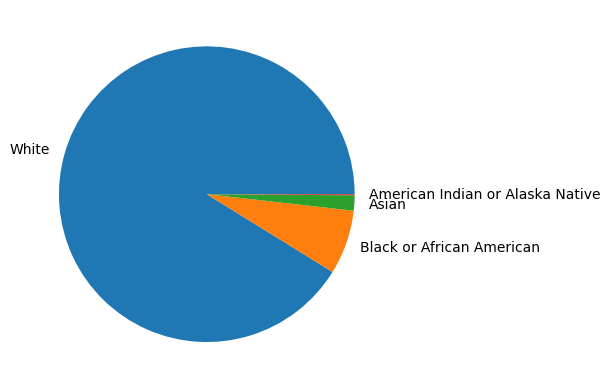

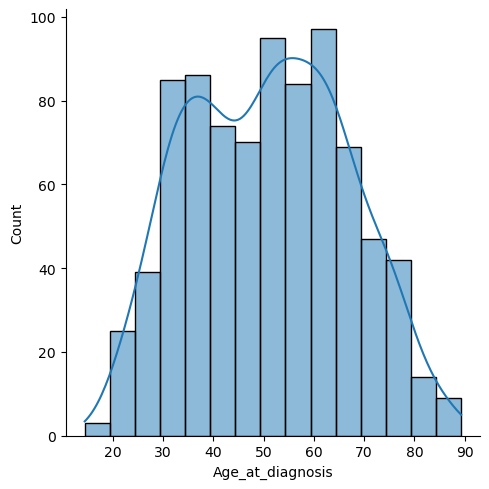

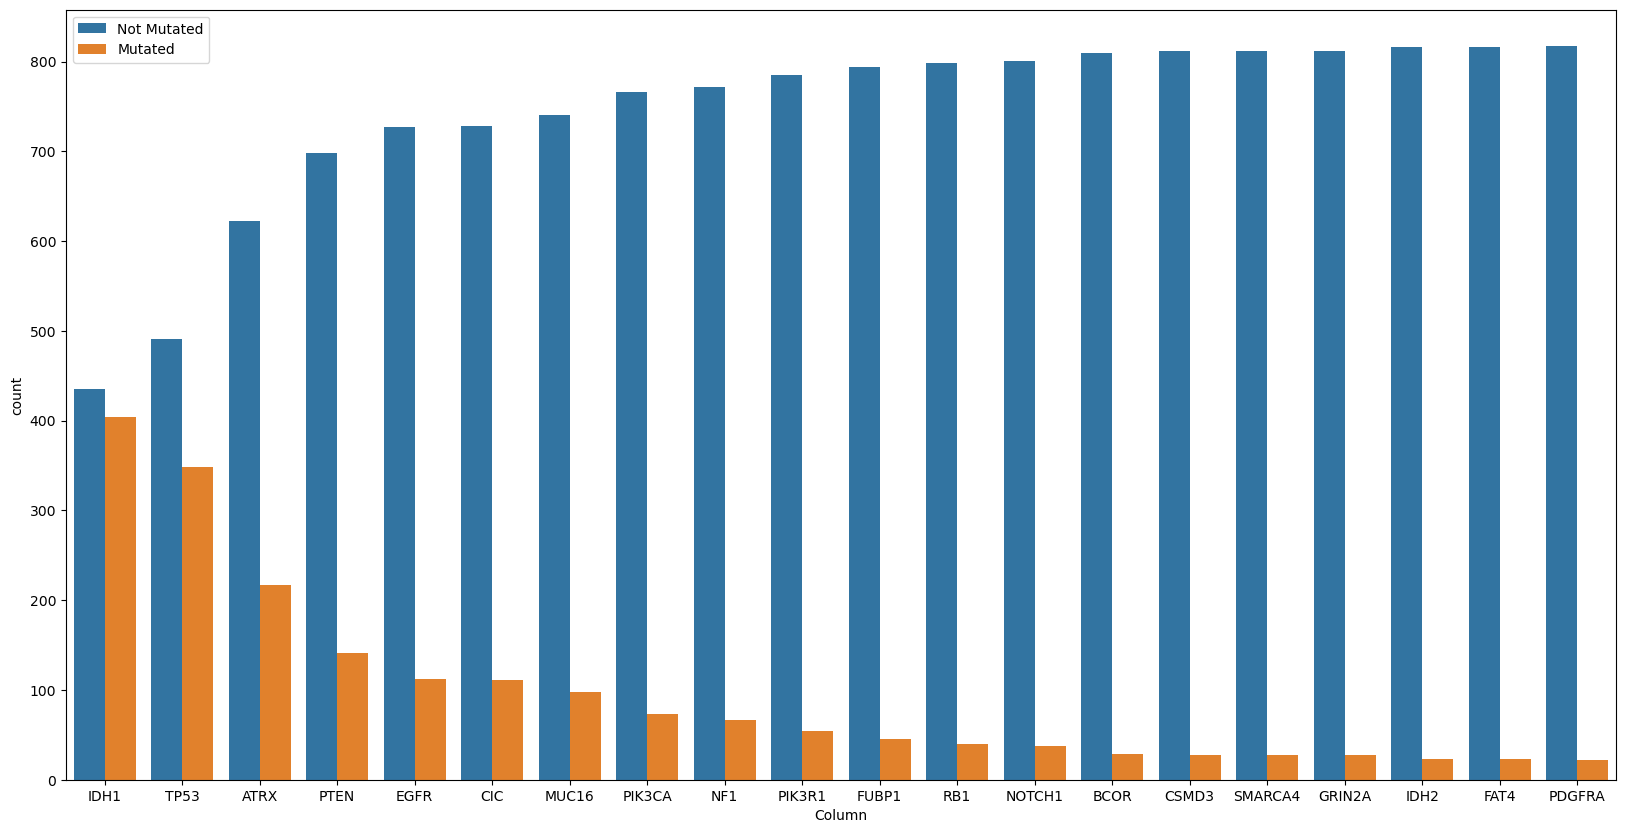

In [38]:
plt.figure()
plt.pie(
    x=df_all['Grade'].value_counts(),
    labels=GRADE,
) 

plt.figure()
plt.pie(
    x= df_all['Gender'].value_counts(),
    labels=GENDER,
) 

plt.figure()
plt.pie(
    x= df_all['Primary_Diagnosis'].value_counts(),
    labels=PRIMARY_DIAGNOSIS,
)

plt.figure()
plt.pie(
    x= df_all['Race'].value_counts(),
    labels=RACE,
)

sns.displot(df_with_grade, kde=True, x='Age_at_diagnosis')
# sns.displot(df_with_grade, kde=True, x='Age_at_diagnosis', hue='Grade')

plt.figure(figsize=(20, 10))
melted_df = df_with_grade[GENES].melt(var_name='Column', value_name='Value')
sns.countplot(data=melted_df, x='Column', hue='Value')
plt.legend(MUTATION)



plt.show()

# Logistical Regression

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [40]:
X = df_with_grade.drop('Grade', axis=1)
y = df_with_grade['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(671, 23)
(168, 23)


In [41]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Model Score: {model.score(X_test, y_test)*100:.2f}%")

Model Score: 86.90%


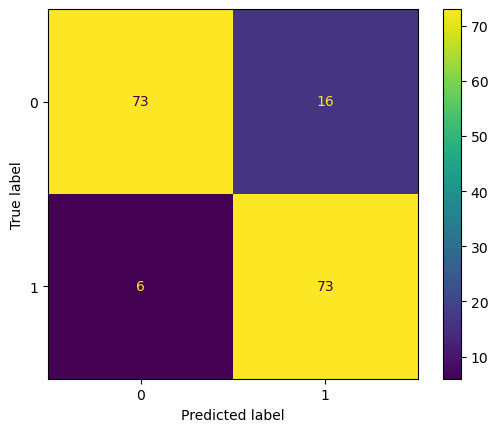

In [42]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        89
           1       0.82      0.92      0.87        79

    accuracy                           0.87       168
   macro avg       0.87      0.87      0.87       168
weighted avg       0.88      0.87      0.87       168

